In [125]:
import csv
import re  
import numpy as np
        
trainrow=[]        
file = open('reviewstrain.txt', 'r')  
lines=file.readlines()

for line in lines:
    line=line.strip(('\t'))
    line=line.strip(('\n'))
    x,y=line.split(" ",1)
    element1=[]
    element1.append(x)
    element1.append(re.sub("\t|\n","",y))
    trainrow.append(element1)

print(len(trainrow))
Num_of_example=len(trainrow)

1500


In [126]:
vocabloury1=[]
for i in range(Num_of_example):
    for x in trainrow[i][1].split(" "):
        vocabloury1.append(str(x))
    
vocabloury1=list(set(vocabloury1))
print(len(vocabloury1))


5861


In [127]:
#------------------------------ Q1-------------------------------------------------

from collections import Counter
vocabloury=[]
for i in range(Num_of_example):
    for x in trainrow[i][1].split(" "):
        vocabloury.append(x)
print(len(vocabloury))

Counter(vocabloury).most_common(5)



28241


[('.', 1426), (',', 1349), ('the', 1255), ('a', 938), ('and', 919)]

In [128]:
#----------------------------------------Q2-----------------------------------------------------------------------
class_entropy=0
positive_example=0
negative_example=0
total_example=1500
print(total_example)

for i in trainrow:
    if(int(i[0])==0):        
        negative_example+=1
    else:
        positive_example+=1

class_entropy=(-(negative_example/total_example)*np.log2(negative_example/total_example))+(-(positive_example/total_example)*np.log2(positive_example/total_example))


1500


In [129]:
dic={}
for j in vocabloury1:
    attribute_true_true=0
    attribute_true_false=0
    attribute_false_true=0
    attribute_false_false=0
    
    for i in trainrow:
        
        l=[]
        for x in i[1].split(" "):
            l.append(x)
        
        
        
        if(str(j) in l) and int(i[0])==1:
            attribute_true_true+=1
         
        elif(str(j) in l) and int(i[0])==0:
            attribute_true_false+=1
          
        elif not(str(j) in l) and int(i[0])==1:
            attribute_false_true+=1
           
        elif not(str(j) in l) and int(i[0])==0:
            attribute_false_false+=1
           
        
    
    total_true_attribute=attribute_true_true+attribute_true_false
    total_false_attribute=attribute_false_true+attribute_false_false
    
    if(attribute_true_true ==0):
        XTT=0
    else:
        XTT=(attribute_true_true/total_true_attribute)*np.log2(attribute_true_true/total_true_attribute)
                     
    if(attribute_true_false ==0):
        XTF=0
    else:
        XTF=(attribute_true_false/total_true_attribute)*np.log2(attribute_true_false/total_true_attribute)
                     
    if(attribute_false_true ==0):
        XFT=0
    else:
        XFT=(attribute_false_true/total_false_attribute)*np.log2(attribute_false_true/total_false_attribute)
                     
    if(attribute_false_false ==0):
        XFF=0
    else:
        XFF=(attribute_false_false/total_false_attribute)*np.log2(attribute_false_false/total_false_attribute)
                     
                  
    entropy_true_attribute=-XTT-XTF
    entropy_false_attribute=-XFT-XFF

    attribute_entropy=(total_true_attribute/1500)*entropy_true_attribute+(total_false_attribute/1500)*entropy_false_attribute
    gain=class_entropy-attribute_entropy
    dic[j]=gain
    
        
        
dictionary1=sorted(dic.items(), key=lambda x: x[1], reverse=True)
#print(dictionary1)

print('Five attribute with highest gain are:')
top5=[]
for i in range(0,5):
    top5.append(dictionary1[i][0])
print(top5)
        

Five attribute with highest gain are:
['bad', 'best', "n't", 'too', 'moving']


In [130]:
#----------------------------Q3-----------------------------------------------------------------------
Num_feature=50
#Num_feature=25
#Num_feature=60
#Num_feature=100
#Num_feature=150
vocab50=[]
for i in range(0,Num_feature):
    vocab50.append(dictionary1[i][0])


In [131]:
shape1=(1500,Num_feature)
shape2=(1500,1)
data101=np.empty(shape1)
output101=np.empty(shape2)

for i in range(0,1500):
    example=trainrow[i]
    
    l=[]
    for zz in example[1].split(" "):
        l.append(zz)
            
    for xx in range(0,Num_feature):
        #if(i==)
        #print(vocab50[xx])
        #print(xx)
        if vocab50[xx] in l:
            data101[i][xx]=1
        else:
            data101[i][xx]=0
        #print(x[i][xx])
    output101[i]=int(example[0])
          

In [132]:
import csv
import re
import pandas as pd
from scipy import sparse
import numpy as np

  
        
testrow=[]        
file = open('reviewstest.txt', 'r')  
lines=file.readlines()

for line in lines:
    line=line.strip(('\t'))
    line=line.strip(('\n'))
    x,y=line.split(" ",1)
    testrow.append((x,re.sub("\t|\n","",y)))
 #   print(x)
#    print(y)

#print(row)

Num_of_example=len(testrow)

In [133]:
shapetest1=(len(testrow),Num_feature)
shapetest2=(len(testrow),1)
testdata101=np.empty(shape1)
testoutput101=np.empty(shape2)

for i in range(0,len(testrow)):
    example=testrow[i]
    
    l=[]
    for zz in example[1].split(" "):
        l.append(zz)
            
    for xx in range(0,Num_feature):
        #if(i==)
        #print(vocab50[xx])
        #print(xx)
        if vocab50[xx] in l:
            testdata101[i][xx]=1
        else:
            testdata101[i][xx]=0
        #print(x[i][xx])
    testoutput101[i]=int(example[0])
    

epoch 0: err 0.998312
epoch 1: err 0.768409
epoch 2: err 0.733210
epoch 3: err 0.702344
epoch 4: err 0.674036
epoch 5: err 0.649471
epoch 6: err 0.629033
epoch 7: err 0.612314
epoch 8: err 0.598758
epoch 9: err 0.587840
epoch 10: err 0.579053
epoch 11: err 0.571943
epoch 12: err 0.566128
epoch 13: err 0.561299
epoch 14: err 0.557220
epoch 15: err 0.553709
epoch 16: err 0.550631
epoch 17: err 0.547887
epoch 18: err 0.545405
epoch 19: err 0.543133
epoch 20: err 0.541032
epoch 21: err 0.539074
epoch 22: err 0.537237
epoch 23: err 0.535504
epoch 24: err 0.533862
epoch 25: err 0.532300
epoch 26: err 0.530810
epoch 27: err 0.529383
epoch 28: err 0.528014
epoch 29: err 0.526696
epoch 30: err 0.525424
epoch 31: err 0.524195
epoch 32: err 0.523003
epoch 33: err 0.521847
epoch 34: err 0.520722
epoch 35: err 0.519627
epoch 36: err 0.518558
epoch 37: err 0.517514
epoch 38: err 0.516492
epoch 39: err 0.515492
epoch 40: err 0.514512
epoch 41: err 0.513549
epoch 42: err 0.512604
epoch 43: err 0.51167

epoch 346: err 0.414499
epoch 347: err 0.414416
epoch 348: err 0.414333
epoch 349: err 0.414251
epoch 350: err 0.414170
epoch 351: err 0.414089
epoch 352: err 0.414009
epoch 353: err 0.413929
epoch 354: err 0.413850
epoch 355: err 0.413771
epoch 356: err 0.413693
epoch 357: err 0.413616
epoch 358: err 0.413539
epoch 359: err 0.413462
epoch 360: err 0.413386
epoch 361: err 0.413311
epoch 362: err 0.413236
epoch 363: err 0.413161
epoch 364: err 0.413087
epoch 365: err 0.413013
epoch 366: err 0.412940
epoch 367: err 0.412868
epoch 368: err 0.412796
epoch 369: err 0.412724
epoch 370: err 0.412653
epoch 371: err 0.412582
epoch 372: err 0.412512
epoch 373: err 0.412442
epoch 374: err 0.412372
epoch 375: err 0.412303
epoch 376: err 0.412235
epoch 377: err 0.412166
epoch 378: err 0.412099
epoch 379: err 0.412031
epoch 380: err 0.411964
epoch 381: err 0.411898
epoch 382: err 0.411832
epoch 383: err 0.411766
epoch 384: err 0.411700
epoch 385: err 0.411635
epoch 386: err 0.411571
epoch 387: err 0

epoch 688: err 0.400876
epoch 689: err 0.400858
epoch 690: err 0.400840
epoch 691: err 0.400823
epoch 692: err 0.400805
epoch 693: err 0.400787
epoch 694: err 0.400770
epoch 695: err 0.400753
epoch 696: err 0.400735
epoch 697: err 0.400718
epoch 698: err 0.400701
epoch 699: err 0.400684
epoch 700: err 0.400667
epoch 701: err 0.400650
epoch 702: err 0.400633
epoch 703: err 0.400616
epoch 704: err 0.400599
epoch 705: err 0.400582
epoch 706: err 0.400565
epoch 707: err 0.400549
epoch 708: err 0.400532
epoch 709: err 0.400516
epoch 710: err 0.400499
epoch 711: err 0.400483
epoch 712: err 0.400466
epoch 713: err 0.400450
epoch 714: err 0.400434
epoch 715: err 0.400418
epoch 716: err 0.400402
epoch 717: err 0.400385
epoch 718: err 0.400369
epoch 719: err 0.400354
epoch 720: err 0.400338
epoch 721: err 0.400322
epoch 722: err 0.400306
epoch 723: err 0.400290
epoch 724: err 0.400275
epoch 725: err 0.400259
epoch 726: err 0.400244
epoch 727: err 0.400228
epoch 728: err 0.400213
epoch 729: err 0

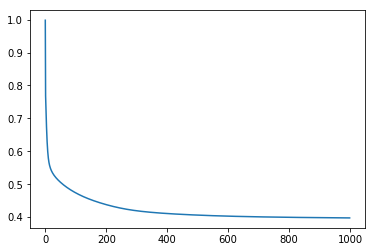

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy(yHat, y):
    if y == 1:
        return -math.log(yHat)
    else:
        return -math.log(1 - yHat)

# I is matrix of input examples
# D is matrix of output examples
# n_hidden is number of nodes in hidden layer
# n_max is number of training epochs
def bp(I, D, n_hidden, eta, n_max, plot=True):
    np.random.seed(1926)
    
    r_inp, c_inp = I.shape
    n_examples = r_inp
    n_input = c_inp
    r_out, c_out = D.shape
    n_output = c_out

    w = np.random.random((n_input, n_hidden))
    wb = np.random.random(n_hidden)
    v = np.random.random((n_hidden, n_output))
    vb = np.random.random(n_output)
    err_curve = np.zeros((n_max,c_out))

    for n in range(n_max):
        cross_entropy_loss = np.zeros((1,n_output))
    
        for k in range(n_examples):
            x = I[k,:].reshape([1,-1])
            z = sigmoid(x.dot(w)+wb)
            y = sigmoid(z.dot(v)+vb)
            cross_entropy_loss += cross_entropy(y[0], D[k,:][0])
            
            Delta_output = (y-D[k,:])/(y*(1-y))
            Delta_v = z.T.dot(y-D[k,:])
            Delta_vb = np.sum(Delta_output,axis=0)

            Delta_hidden = v.dot(y-D[k,:])
            Delta_w = x.T.dot(Delta_hidden.T)z(1-z)  
            Delta_wb = np.sum(Delta_hidden,axis=0)
        
            v -= eta * Delta_v
            vb -= eta * Delta_vb
            w -= eta * Delta_w
            wb -= eta * Delta_wb

            err_curve[n] = cross_entropy_loss/n_examples
        if plot == True:
            if n % 50 == 0:
                print('Epoch %d: Cross Entropy Error: %f' % (n,np.mean(cross_entropy_loss)/n_examples))
    if plot == True:
        print('Epoch %d: Cross Entropy Error: %f' % (n,np.mean(cross_entropy_loss)/n_examples))
    
    if plot == True:
        plt.plot(np.linspace(0,n_max-1,n_max),np.sum(err_curve,axis=1))
        plt.xlabel('epochs')
        plt.ylabel('cross-entropy error')
        plt.show()
    return w, wb, v, vb, err_curve       

w,wb,v,vb,err_curve = bp(data101,output101, 100, 0.03, 1000)



In [135]:
#predict
prediction=[]
for k in range(len(testrow)):
    x = testdata101[k,:].reshape([1,-1])
    z = sigmoid(x.dot(w)+wb)
    y = sigmoid(z.dot(v)+vb)
    #
    for o in y:
        value=0
        if(int(o[0]>=0.5)):
            value=1
        else:
            value=0
        prediction.append(value)
print(prediction)

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 

In [139]:
correct=0
wrong=0
FP5=0
FN5=0
TP5=0
TN5=0


for check in range(0,len(testrow)):
    if(int((testrow[check])[0])==1 and prediction[check]==1):
        TP5+=1
        correct+=1
    elif(int((testrow[check])[0])==1 and prediction[check]==0):
        FN5+=1
        wrong+=1
    elif(int((testrow[check])[0])==0 and prediction[check]==0):
        TN5+=1
        correct+=1
    elif(int((testrow[check])[0])==0 and prediction[check]==1):
        FP5+=1
        wrong+=1
accuracy=correct*100/(wrong+correct)
print("accuracy is ",accuracy)

print("TP= ",TP5)
print("FP= ",FP5)
print("TN= ",TN5)
print("FN= ",FN5)

67.2
TP=  209
FP=  100
TN=  127
FN=  64


In [104]:
#--------------------------------------4Q----------------------------------------------

zero=0
one=0
for i in trainrow:
    if int(i[0])==0:
        zero+=1
    else:
        one+=1
print(zero,one)
if(zero>one):
    Zero_predict=0
else:
    Zero_predict=1
zero_predict_test=[]    
for i in range(len(testrow)):
    zero_predict_test.append(Zero_predict)


zerocorrect=0
zerowrong=0
for check in range(len(testrow)):
    
    if int(testrow[check][0])==int(zero_predict_test[check]):
        zerocorrect+=1
    else:
        zerowrong+=1

zeroaccuracy=zerocorrect*100/(zerowrong+zerocorrect)
print(zeroaccuracy)
        

689 811
54.6


In [ ]:
#------------Q6------------
#substitue value of Num_feature in Q3
#it is already there just uncomment them